<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_concrete_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [5]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/concrete_data.csv")

# Data conversion

In [7]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [11]:
# No conversion required

# Duplicates

In [12]:
df = df.drop_duplicates()

# Outliers Removal

In [13]:
# Remove Outliers using Z-score method (threshold = 3)
z_scores = np.abs(zscore(df))
df = df[(z_scores < 3).all(axis=1)]


# Normalize

In [16]:
# Normalize Data (Min-Max Scaling)
df_normalized = (df - df.min()) / (df.max() - df.min())


# Visualization

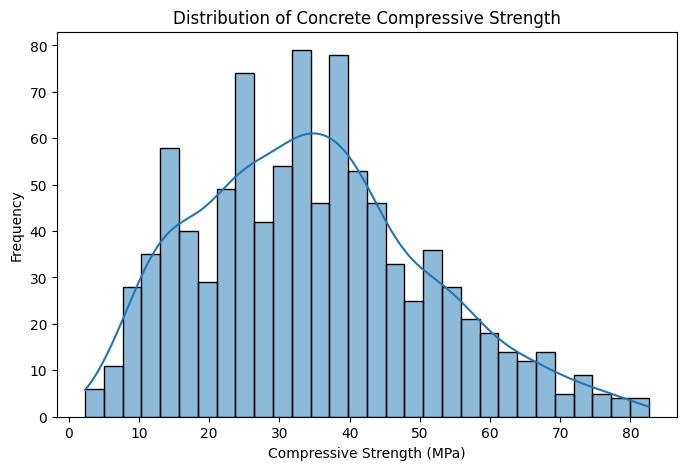

In [18]:
# Visualization - Distribution of Strength
plt.figure(figsize=(8, 5))
sns.histplot(df["concrete_compressive_strength"], bins=30, kde=True)
plt.title("Distribution of Concrete Compressive Strength")
plt.xlabel("Compressive Strength (MPa)")
plt.ylabel("Frequency")
plt.show()
